## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
a, b = -1, 2
x = np.linspace(0,20)
y = a*x +b

In [3]:
X = np.ones((x.shape[0], 2))
X[:,1] = x
print(X)

[[ 1.          0.        ]
 [ 1.          0.40816327]
 [ 1.          0.81632653]
 [ 1.          1.2244898 ]
 [ 1.          1.63265306]
 [ 1.          2.04081633]
 [ 1.          2.44897959]
 [ 1.          2.85714286]
 [ 1.          3.26530612]
 [ 1.          3.67346939]
 [ 1.          4.08163265]
 [ 1.          4.48979592]
 [ 1.          4.89795918]
 [ 1.          5.30612245]
 [ 1.          5.71428571]
 [ 1.          6.12244898]
 [ 1.          6.53061224]
 [ 1.          6.93877551]
 [ 1.          7.34693878]
 [ 1.          7.75510204]
 [ 1.          8.16326531]
 [ 1.          8.57142857]
 [ 1.          8.97959184]
 [ 1.          9.3877551 ]
 [ 1.          9.79591837]
 [ 1.         10.20408163]
 [ 1.         10.6122449 ]
 [ 1.         11.02040816]
 [ 1.         11.42857143]
 [ 1.         11.83673469]
 [ 1.         12.24489796]
 [ 1.         12.65306122]
 [ 1.         13.06122449]
 [ 1.         13.46938776]
 [ 1.         13.87755102]
 [ 1.         14.28571429]
 [ 1.         14.69387755]
 

#### Plot your data points. 

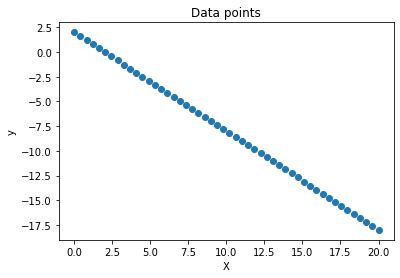

In [4]:
plt.scatter(x,y)
plt.xlabel("X"), plt.ylabel("y"), plt.title("Data points")
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

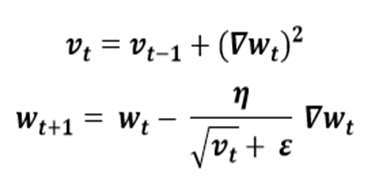

In [5]:
#Adagrad implementation:
def LR_adagrad(X, y, alpha= 0.001, eps=1e-6, epochs=1000):
    m = len(y)
    theta = np.zeros((X.shape[1]))
    theta_values =[[],[]]
    cost_values = []
    hyp_values = []
    
    vt = np.zeros((X.shape[1]))
    
    for i in range(epochs):
        hyp = X @ theta
        hyp_values.append(hyp)
        
        z = hyp - y
        cost = np.mean(z**2)/2
        cost_values.append(cost)
        
        dtheta = (X.T @ z)/m
        vt += dtheta**2
        
        adaptive_alpha = alpha/(eps + vt**0.5)
        
        theta -= adaptive_alpha*dtheta
        
        
        theta_values[0].append(theta[0])
        theta_values[1].append(theta[1])
        
        #stopping condition:
        #Gradient condition
        if (np.linalg.norm(dtheta, ord=2) <= 0.0001):
            print(f"program stopped at the {i}th epoch")
            break
            
        #Cost Condition
        if i>2 and abs(cost_values[-2]-cost_values[-1]) <= 0.0001:
            print(f"program stopped at the {i}th epoch")
            break

    print(f"Final Cost={cost_values[-1]}")
    print(f"Final Gradient={np.linalg.norm(dtheta, ord=2)}")
    return theta, cost_values, hyp_values ,theta_values

In [6]:
#Plotting functions:
def plot_cost(cost, x=None):
    if x == None: 
        #Plot vs. iterations:
        plt.plot(cost)
        plt.title("Cost per iteration")
        plt.xlabel("iterations"), plt.ylabel("Cost")
    else: 
        #plot vs. theta:
        plt.plot(x, cost)
        plt.title("Cost per theta")
        plt.xlabel("theta"), plt.ylabel("Cost")
    plt.grid()
    plt.show()

In [7]:
def plot_lines(x, y, hyp_values):
    plt.scatter(x,y, label="Original Data")
    for hyp in hyp_values:
        plt.plot(x, hyp, "r", alpha=0.4)
    plt.grid()
    plt.legend()
    plt.show()
    
def plot_best_line(x, y, y_predict):
    plt.scatter(x, y, marker="+", label = "Original Data", alpha=0.7)
    plt.plot(x, y_predict, "r", label = "Predicted Line")
    plt.xlabel("X"), plt.ylabel("y"), plt.title("Predicted vs. Original")
    plt.legend()
    plt.grid()
    plt.show()

In [8]:
theta, cost_values, hyp_values,theta_values = LR_adagrad(X, y, alpha= 0.6, eps=1e-6, epochs=1000)

#Calculate R2 score:
print("R2 score=", metrics.r2_score(y, hyp_values[-1]))

program stopped at the 177th epoch
Final Cost=0.0029355964879551567
Final Gradient=0.051551571448208815
R2 score= 0.9998307714965767


Cost vs. iterations:


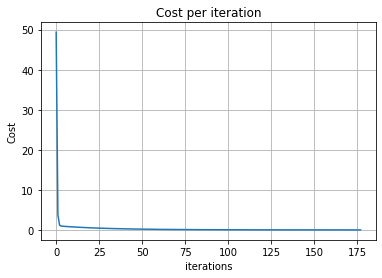

Cost vs. theta_0:


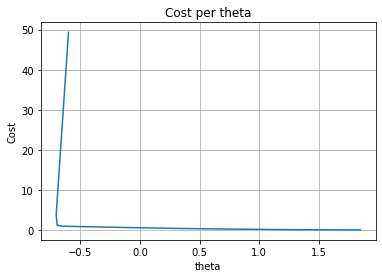

Cost vs. theta_1:


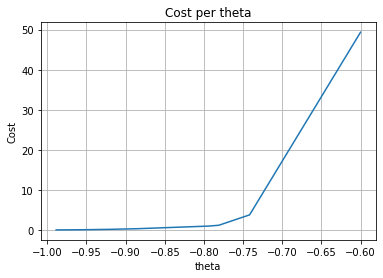

In [9]:
#Curves:
print("Cost vs. iterations:")
plot_cost(cost_values)
print("Cost vs. theta_0:")
plot_cost(cost_values, theta_values[0])
print("Cost vs. theta_1:")
plot_cost(cost_values, theta_values[1])

Hypothesis lines:


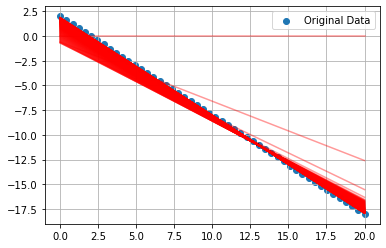

Best fit line:


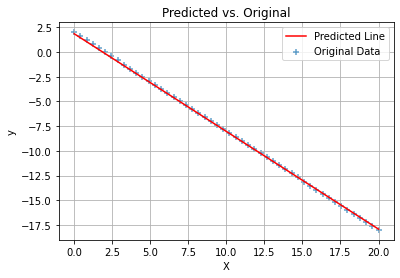

In [10]:
#predicted Lines:
print("Hypothesis lines:")
plot_lines(x, y, hyp_values)
print("Best fit line:")
plot_best_line(x,y, hyp_values[-1])

alpha= 1, eps= 1e-8, epochs=100 :

Final Cost=0.00470022076872138
Final Gradient=0.06493431663810677
R2 score= 0.999729046096862
Cost vs. iterations:


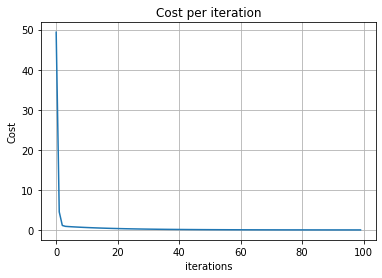

Cost vs. theta_0:


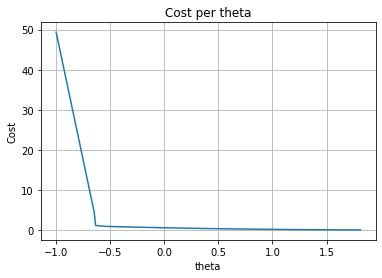

Cost vs. theta_1:


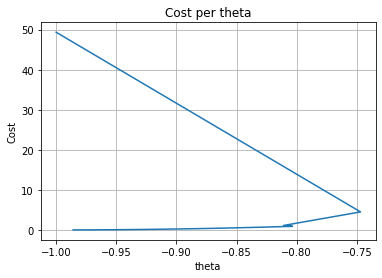

Hypothesis lines:


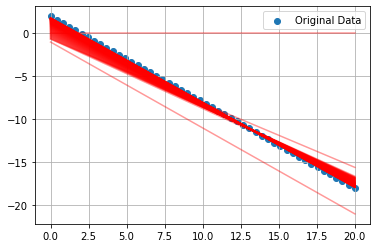

Best fit line:


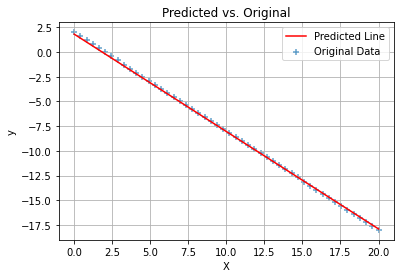

In [11]:
#Different hyper paramters:

print("alpha= 1, eps= 1e-8, epochs=100 :\n")
theta, cost_values, hyp_values,theta_values = LR_adagrad(X, y, alpha= 1, eps=1e-8, epochs=100)

#Calculate R2 score:
print("R2 score=", metrics.r2_score(y, hyp_values[-1]))

#Curves:
print("Cost vs. iterations:")
plot_cost(cost_values)
print("Cost vs. theta_0:")
plot_cost(cost_values, theta_values[0])
print("Cost vs. theta_1:")
plot_cost(cost_values, theta_values[1])

#predicted Lines:
print("Hypothesis lines:")
plot_lines(x, y, hyp_values)
print("Best fit line:")
plot_best_line(x,y, hyp_values[-1])

alpha= 0.02, eps= 1e-4, epochs=3000 :

program stopped at the 2246th epoch
Final Cost=0.8040690285727695
Final Gradient=1.178539544300782
R2 score= 0.9536477854116874
Cost vs. iterations:


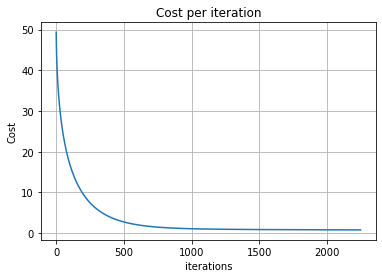

Cost vs. theta_0:


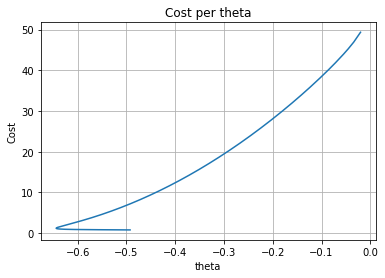

Cost vs. theta_1:


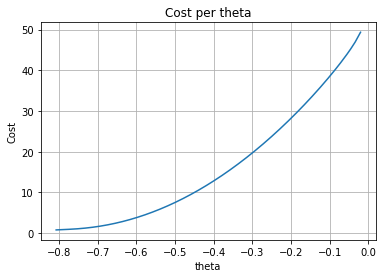

Hypothesis lines:


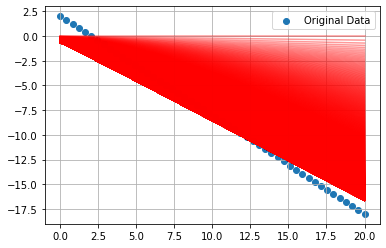

Best fit line:


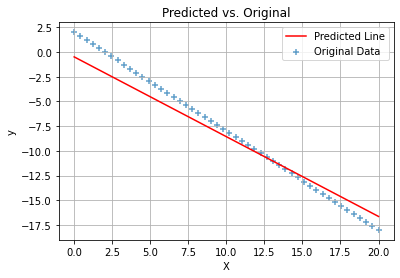

In [12]:
#Different hyper paramters:

print("alpha= 0.02, eps= 1e-4, epochs=3000 :\n")
theta, cost_values, hyp_values,theta_values = LR_adagrad(X, y, alpha= 0.02, eps=1e-4, epochs=3000)

#Calculate R2 score:
print("R2 score=", metrics.r2_score(y, hyp_values[-1]))

#Curves:
print("Cost vs. iterations:")
plot_cost(cost_values)
print("Cost vs. theta_0:")
plot_cost(cost_values, theta_values[0])
print("Cost vs. theta_1:")
plot_cost(cost_values, theta_values[1])

#predicted Lines:
print("Hypothesis lines:")
plot_lines(x, y, hyp_values)
print("Best fit line:")
plot_best_line(x,y, hyp_values[-1])

alpha= 0.001, eps= 1e-10, epochs=3000 :

Final Cost=0.8296250385182914
Final Gradient=1.4187945819499184
R2 score= 0.9521745566030632
Cost vs. iterations:


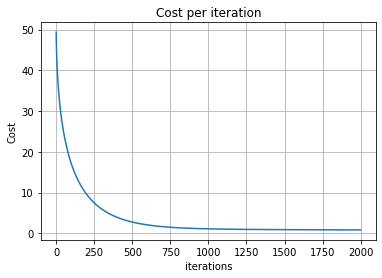

Cost vs. theta_0:


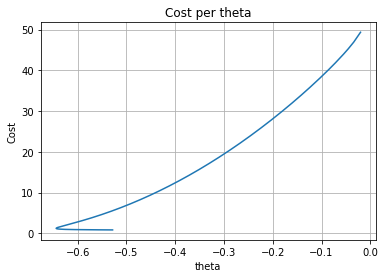

Cost vs. theta_1:


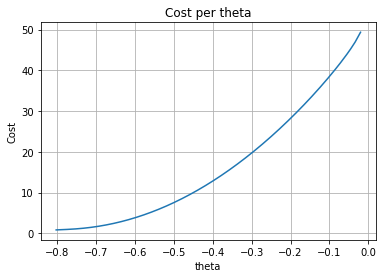

Hypothesis lines:


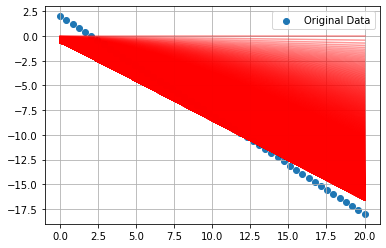

Best fit line:


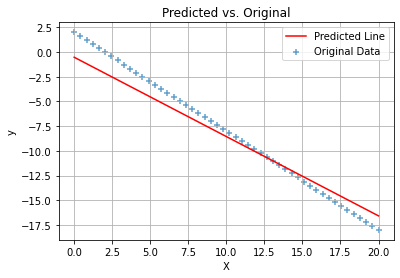

In [13]:
print("alpha= 0.001, eps= 1e-10, epochs=3000 :\n")
theta, cost_values, hyp_values,theta_values = LR_adagrad(X, y, alpha= 0.02, eps=1e-4, epochs=2000)

#Calculate R2 score:
print("R2 score=", metrics.r2_score(y, hyp_values[-1]))

#Curves:
print("Cost vs. iterations:")
plot_cost(cost_values)
print("Cost vs. theta_0:")
plot_cost(cost_values, theta_values[0])
print("Cost vs. theta_1:")
plot_cost(cost_values, theta_values[1])

#predicted Lines:
print("Hypothesis lines:")
plot_lines(x, y, hyp_values)
print("Best fit line:")
plot_best_line(x,y, hyp_values[-1])

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

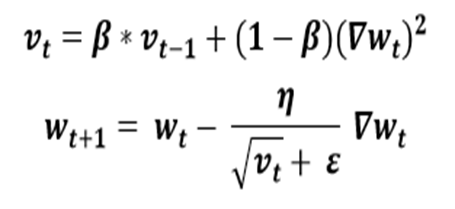

In [14]:
#RMSProb implementation:
def LR_rms(X, y, alpha= 0.001, eps=1e-6, beta=0.9, epochs=1000):
    m = len(y)
    theta = np.zeros((X.shape[1]))
    theta_values =[[],[]]
    cost_values = []
    hyp_values = []
    
    vt = np.zeros((X.shape[1]))
    
    for i in range(epochs):
        hyp = X @ theta
        hyp_values.append(hyp)
        
        z = hyp - y
        cost = np.mean(z**2)/2
        cost_values.append(cost)
        
        dtheta = (X.T @ z)/m
        vt = beta*vt + (1-beta)*dtheta**2
        
        adaptive_alpha = alpha/(eps + vt**0.5)
        
        theta -= adaptive_alpha*dtheta
        
        
        theta_values[0].append(theta[0])
        theta_values[1].append(theta[1])
            
        #stopping condition:
        #Gradient condition
        if (np.linalg.norm(dtheta, ord=2) <= 0.0001):
            print(f"program stopped at the {i}th epoch")
            break
            
        #Cost Condition
        if i>2 and abs(cost_values[-2]-cost_values[-1]) <= 0.0001:
            print(f"program stopped at the {i}th epoch")
            break

    print(f"Final Cost={cost_values[-1]}")
    print(f"Final Gradient={np.linalg.norm(dtheta, ord=2)}")
    return theta, cost_values, hyp_values, theta_values

program stopped at the 401th epoch
Final Cost=0.006511826830222306
Final Gradient=0.7304941810929574
R2 score= 0.9996246123356696
Cost vs. iterations:


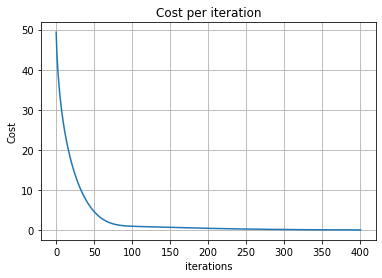

Cost vs. theta_0:


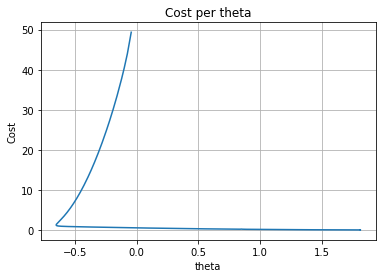

Cost vs. theta_1:


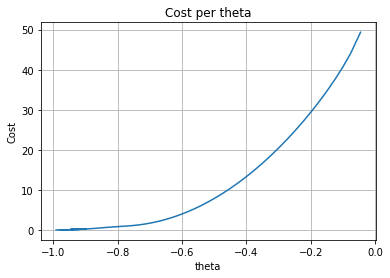

Hypothesis lines:


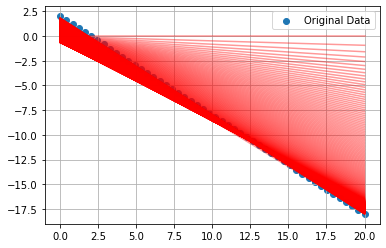

Best fit line:


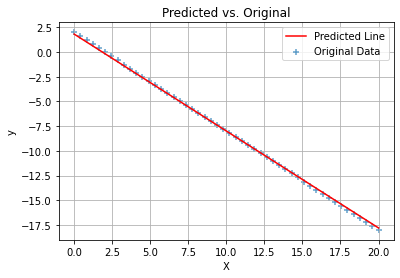

In [15]:
theta, cost_values, hyp_values, theta_values = LR_rms(X, y, alpha= 0.01, eps=1e-6, beta=0.95, epochs=1000)

#Calculate R2 score:
print("R2 score=", metrics.r2_score(y, hyp_values[-1]))

#Curves:
print("Cost vs. iterations:")
plot_cost(cost_values)
print("Cost vs. theta_0:")
plot_cost(cost_values, theta_values[0])
print("Cost vs. theta_1:")
plot_cost(cost_values, theta_values[1])

#predicted Lines:
print("Hypothesis lines:")
plot_lines(x, y, hyp_values)
print("Best fit line:")
plot_best_line(x,y, hyp_values[-1])

program stopped at the 298th epoch
Final Cost=6.962070836978103
Final Gradient=43.39602919869787
R2 score= 0.5986570929271448
Cost vs. iterations:


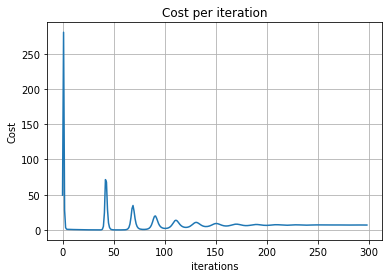

Cost vs. theta_0:


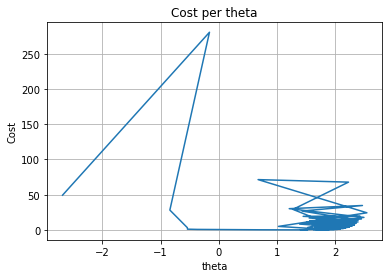

Cost vs. theta_1:


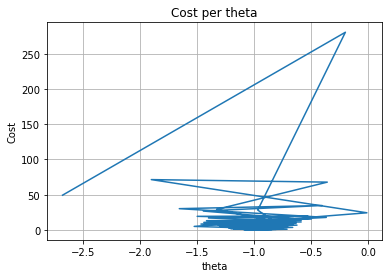

Hypothesis lines:


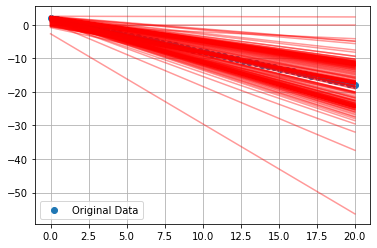

Best fit line:


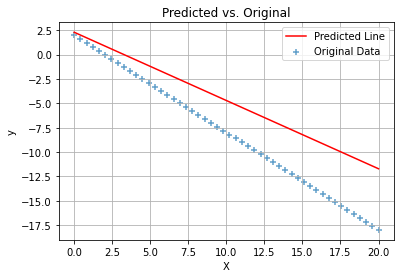

In [16]:
#Comparing RMSProp with Adagrad:
# at alpha = 0.6, eps= 1e-6, epochs = 1000:
#Adagrad R2 score = 0.99

#RMSProb: 
theta, cost_values, hyp_values, theta_values = LR_rms(X, y, alpha= 0.6, eps=1e-6, beta=0.95, epochs=1000)

#Calculate R2 score:
print("R2 score=", metrics.r2_score(y, hyp_values[-1]))

#result: Adagrad performs much better than RMS for the given hyperparameters.

#Curves:
print("Cost vs. iterations:")
plot_cost(cost_values)
print("Cost vs. theta_0:")
plot_cost(cost_values, theta_values[0])
print("Cost vs. theta_1:")
plot_cost(cost_values, theta_values[1])

#predicted Lines:
print("Hypothesis lines:")
plot_lines(x, y, hyp_values)
print("Best fit line:")
plot_best_line(x,y, hyp_values[-1])

alpha = 0.05, eps= 1e-5, beta= 0.7, epochs = 500 :

program stopped at the 126th epoch
Final Cost=0.04994942580198367
Final Gradient=3.648918894851759
R2 score= 0.9971205625125915
Cost vs. iterations:


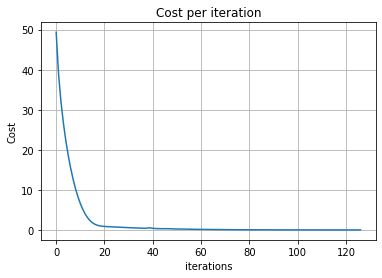

Cost vs. theta_0:


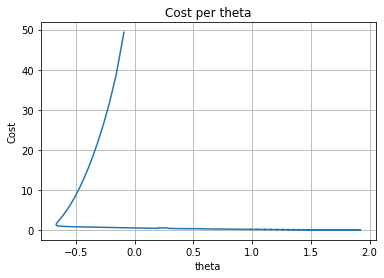

Cost vs. theta_1:


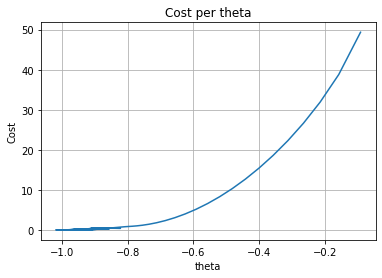

Hypothesis lines:


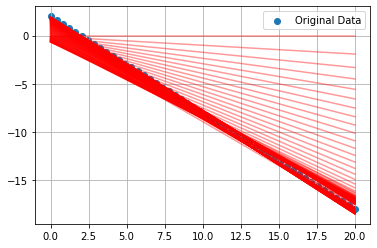

Best fit line:


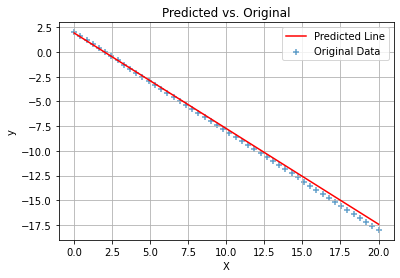

In [17]:
print("alpha = 0.05, eps= 1e-5, beta= 0.7, epochs = 500 :\n")
theta, cost_values, hyp_values, theta_values = LR_rms(X, y, alpha= 0.05, eps=1e-5, beta=0.7, epochs=500)

#Calculate R2 score:
print("R2 score=", metrics.r2_score(y, hyp_values[-1]))

#Curves:
print("Cost vs. iterations:")
plot_cost(cost_values)
print("Cost vs. theta_0:")
plot_cost(cost_values, theta_values[0])
print("Cost vs. theta_1:")
plot_cost(cost_values, theta_values[1])

#predicted Lines:
print("Hypothesis lines:")
plot_lines(x, y, hyp_values)
print("Best fit line:")
plot_best_line(x,y, hyp_values[-1])

alpha = 0.005, eps= 1e-8, beta= 0.9, epochs = 1000 :

program stopped at the 703th epoch
Final Cost=0.0023822881220255917
Final Gradient=0.369241399842489
R2 score= 0.999862668096495
Cost vs. iterations:


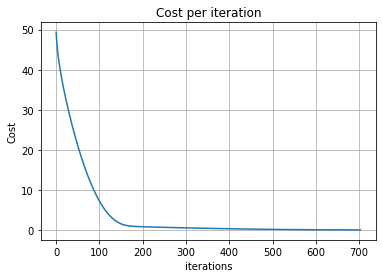

Cost vs. theta_0:


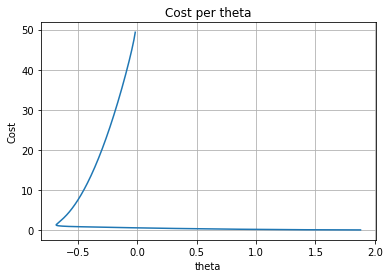

Cost vs. theta_1:


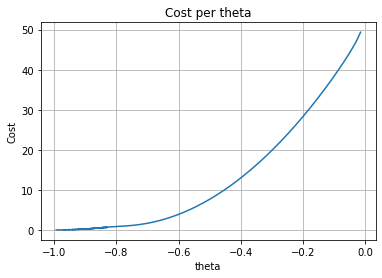

Hypothesis lines:


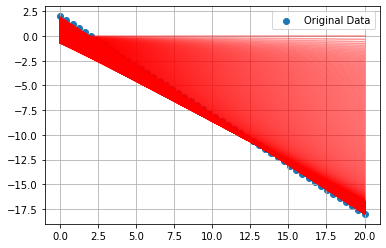

Best fit line:


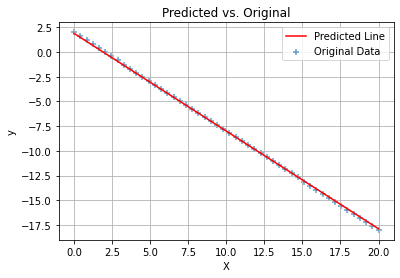

In [18]:
print("alpha = 0.005, eps= 1e-8, beta= 0.9, epochs = 1000 :\n")
theta, cost_values, hyp_values, theta_values = LR_rms(X, y, alpha= 0.005, eps=1e-8, beta=0.9, epochs=1000)

#Calculate R2 score:
print("R2 score=", metrics.r2_score(y, hyp_values[-1]))

#Curves:
print("Cost vs. iterations:")
plot_cost(cost_values)
print("Cost vs. theta_0:")
plot_cost(cost_values, theta_values[0])
print("Cost vs. theta_1:")
plot_cost(cost_values, theta_values[1])

#predicted Lines:
print("Hypothesis lines:")
plot_lines(x, y, hyp_values)
print("Best fit line:")
plot_best_line(x,y, hyp_values[-1])

alpha = 0.05, eps= 1e-5, beta= 0.99, epochs = 500: 

program stopped at the 105th epoch
Final Cost=0.001064166117153879
Final Gradient=0.030637513591668483
R2 score= 0.9999386539532464
Cost vs. iterations:


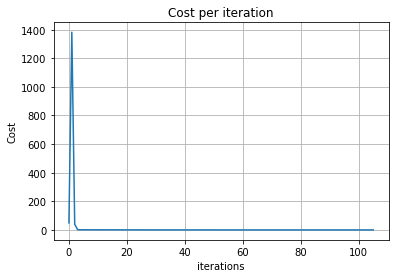

Cost vs. theta_0:


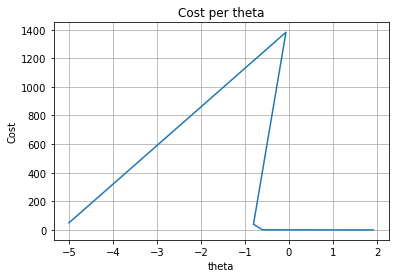

Cost vs. theta_1:


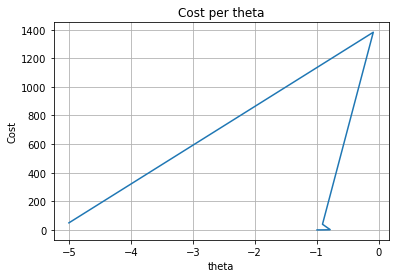

Hypothesis lines:


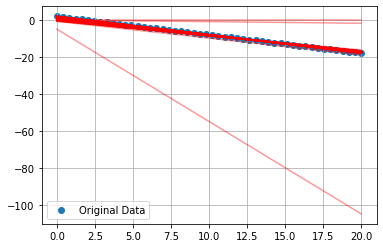

Best fit line:


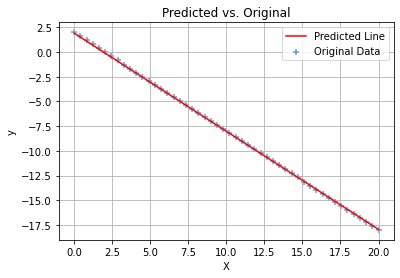

In [19]:
print("alpha = 0.05, eps= 1e-5, beta= 0.99, epochs = 500: \n")
theta, cost_values, hyp_values, theta_values = LR_rms(X, y, alpha= 0.5, eps=1e-5, beta=0.99, epochs=500)

#Calculate R2 score:
print("R2 score=", metrics.r2_score(y, hyp_values[-1]))

#Curves:
print("Cost vs. iterations:")
plot_cost(cost_values)
print("Cost vs. theta_0:")
plot_cost(cost_values, theta_values[0])
print("Cost vs. theta_1:")
plot_cost(cost_values, theta_values[1])

#predicted Lines:
print("Hypothesis lines:")
plot_lines(x, y, hyp_values)
print("Best fit line:")
plot_best_line(x,y, hyp_values[-1])

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

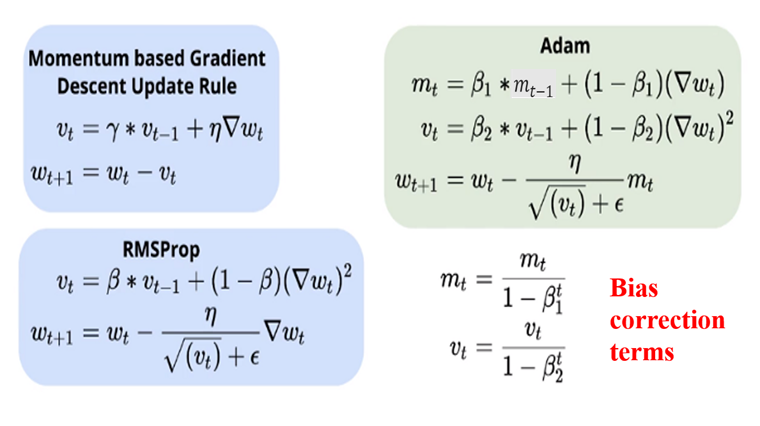

In [20]:
#Adam implementation:
def LR_adam(X, y, alpha= 0.001, eps=1e-6, beta1=0.9, beta2=0.99, epochs=1000):
    m = len(y)
    theta = np.zeros((X.shape[1]))
    theta_values =[[],[]]
    cost_values = []
    hyp_values = []
    
    vt = np.zeros((X.shape[1]))
    moment = 0 
    
    for i in range(epochs):
        hyp = X @ theta
        hyp_values.append(hyp)
        
        z = hyp - y
        cost = np.mean(z**2)/2
        cost_values.append(cost)
        
        dtheta = (X.T @ z)/m
        moment = beta1*moment + (1-beta1)*dtheta
        vt = beta2*vt + (1-beta2)*dtheta**2
        
        #Bias Correction:
        moment_corrected = moment/(1 - beta1**(i+1))
        vt_corrected = vt/(1 - beta2**(i+1))
        
        adaptive_alpha = alpha/(eps + vt_corrected**0.5)
        
        theta -= adaptive_alpha*moment_corrected
        
        
        theta_values[0].append(theta[0])
        theta_values[1].append(theta[1])
            
        #stopping condition:
        #Gradient condition
        if (np.linalg.norm(dtheta, ord=2) <= 0.0001):
            print(f"program stopped at the {i}th epoch")
            break
            
        #Cost Condition
        if i>2 and abs(cost_values[-2]-cost_values[-1]) <= 0.0001:
            print(f"program stopped at the {i}th epoch")
            break

    print(f"Final Cost={cost_values[-1]}")
    print(f"Final Gradient={np.linalg.norm(dtheta, ord=2)}")
    return theta, cost_values, hyp_values, theta_values

program stopped at the 177th epoch
Final Cost=0.0010273703991440118
Final Gradient=0.024581517615219022
R2 score= 0.999940775118167
Cost vs. iterations:


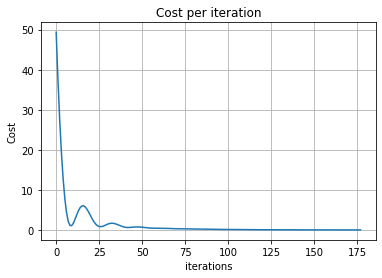

Cost vs. theta_0:


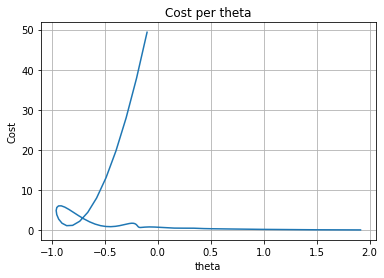

Cost vs. theta_1:


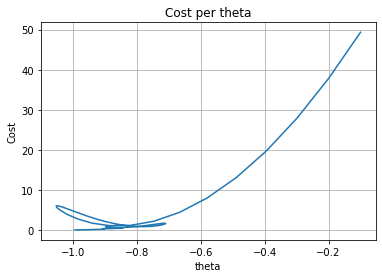

Hypothesis lines:


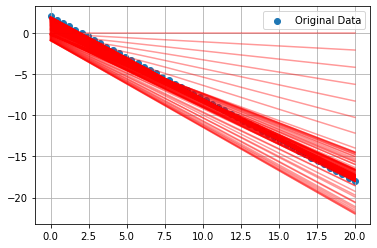

Best fit line:


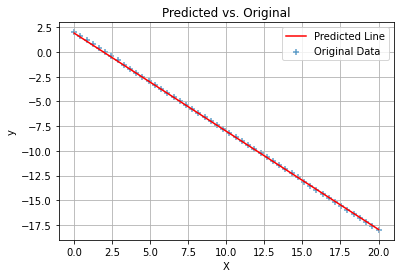

In [21]:
theta, cost_values, hyp_values, theta_values = LR_adam(X, y, alpha= 0.1, eps=1e-6, beta1=0.9, beta2=0.99, epochs=1000)

#Calculate R2 score:
print("R2 score=", metrics.r2_score(y, hyp_values[-1]))

#Curves:
print("Cost vs. iterations:")
plot_cost(cost_values)
print("Cost vs. theta_0:")
plot_cost(cost_values, theta_values[0])
print("Cost vs. theta_1:")
plot_cost(cost_values, theta_values[1])

#predicted Lines:
print("Hypothesis lines:")
plot_lines(x, y, hyp_values)
print("Best fit line:")
plot_best_line(x,y, hyp_values[-1])

alpha= 0.05, eps=1e-5, beta1=0.9, beta2=0.9, epochs=200 :

program stopped at the 127th epoch
Final Cost=0.004488960589910907
Final Gradient=0.20079726975373863
R2 score= 0.9997412246248168
Cost vs. iterations:


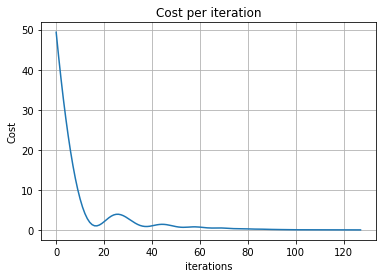

Cost vs. theta_0:


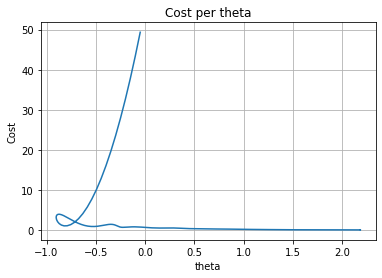

Cost vs. theta_1:


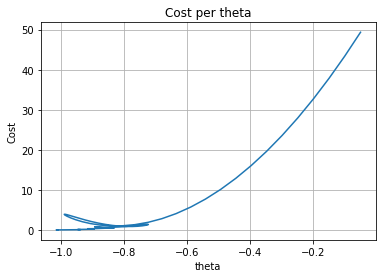

Hypothesis lines:


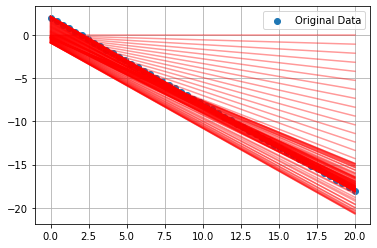

Best fit line:


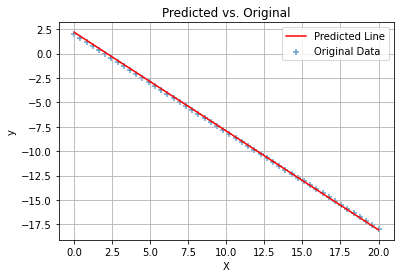

In [22]:
print("alpha= 0.05, eps=1e-5, beta1=0.9, beta2=0.9, epochs=200 :\n")
theta, cost_values, hyp_values, theta_values = LR_adam(X, y, alpha= 0.05, eps=1e-5, beta1=0.9, beta2=0.9, epochs=200)

#Calculate R2 score:
print("R2 score=", metrics.r2_score(y, hyp_values[-1]))

#Curves:
print("Cost vs. iterations:")
plot_cost(cost_values)
print("Cost vs. theta_0:")
plot_cost(cost_values, theta_values[0])
print("Cost vs. theta_1:")
plot_cost(cost_values, theta_values[1])

#predicted Lines:
print("Hypothesis lines:")
plot_lines(x, y, hyp_values)
print("Best fit line:")
plot_best_line(x,y, hyp_values[-1])

In [23]:
#Comparing all algorithms:
print("at alpha= 0.05, eps=1e-5, beta1=0.9, beta2=0.9, epochs=500 :\n")
print("Adagrad results:")
theta1, cost_values1, hyp_values1 ,theta_values1 = LR_adagrad(X, y, alpha= 0.05, eps=1e-5, epochs=500)
print("R2 score =", metrics.r2_score(y, hyp_values1[-1]))

print("\nRMSProb results:")
theta2, cost_values2, hyp_values2 ,theta_values2 = LR_rms(X, y, alpha= 0.05, eps=1e-5, beta=0.9, epochs=500)
print("R2 score =", metrics.r2_score(y, hyp_values2[-1]))

print("\nAdam results:")
theta3, cost_values3, hyp_values3 ,theta_values3 = LR_adam(X, y, alpha= 0.05, eps=1e-5, beta1=0.9, beta2=0.9, epochs=500)
print("R2 score =", metrics.r2_score(y, hyp_values3[-1]))

at alpha= 0.05, eps=1e-5, beta1=0.9, beta2=0.9, epochs=500 :

Adagrad results:
Final Cost=0.7485721289043206
Final Gradient=0.9408946962731294
R2 score = 0.956847018451398

RMSProb results:
program stopped at the 103th epoch
Final Cost=0.009643286413002454
Final Gradient=0.5912655315977907
R2 score = 0.9994440929008975

Adam results:
program stopped at the 127th epoch
Final Cost=0.004488960589910907
Final Gradient=0.20079726975373863
R2 score = 0.9997412246248168


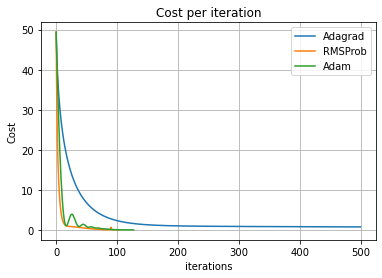

In [24]:
#Plot cost vs. iterations:
plt.plot(cost_values1, label="Adagrad")
plt.plot(cost_values2, label="RMSProb")
plt.plot(cost_values3, label="Adam")
plt.title("Cost per iteration")
plt.xlabel("iterations"), plt.ylabel("Cost")
plt.grid(), plt.legend()
plt.show()

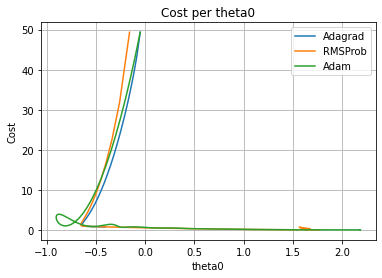

In [25]:
#Plot cost vs. theta0
plt.plot(theta_values1[0], cost_values1, label="Adagrad")
plt.plot(theta_values2[0], cost_values2, label="RMSProb")
plt.plot(theta_values3[0], cost_values3, label="Adam")
plt.title("Cost per theta0")
plt.xlabel("theta0"), plt.ylabel("Cost")
plt.grid(), plt.legend()
plt.show()

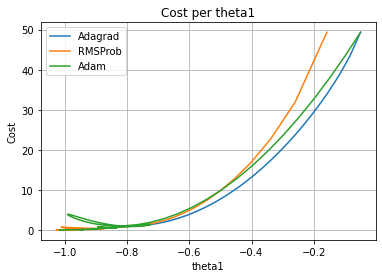

In [26]:
#Plot cost vs. theta1
plt.plot(theta_values1[1], cost_values1, label="Adagrad")
plt.plot(theta_values2[1], cost_values2, label="RMSProb")
plt.plot(theta_values3[1], cost_values3, label="Adam")
plt.title("Cost per theta1")
plt.xlabel("theta1"), plt.ylabel("Cost")
plt.grid(), plt.legend()
plt.show()

Adagrad Predicted lines:
Hypothesis lines:


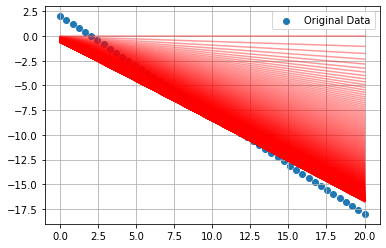

Best fit line:


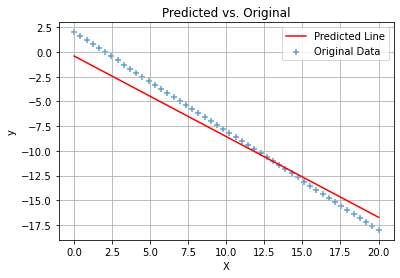

In [27]:
#predicted Lines:
print("Adagrad Predicted lines:")
print("Hypothesis lines:")
plot_lines(x, y, hyp_values1)
print("Best fit line:")
plot_best_line(x,y, hyp_values1[-1])

RMSProb Predicted lines:
Hypothesis lines:


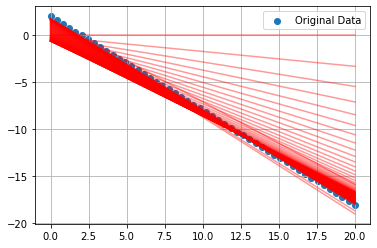

Best fit line:


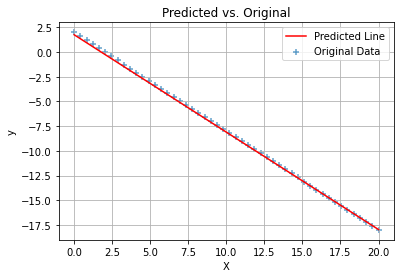

In [28]:
print("RMSProb Predicted lines:")
print("Hypothesis lines:")
plot_lines(x, y, hyp_values2)
print("Best fit line:")
plot_best_line(x,y, hyp_values2[-1])

Adam Predicted lines:
Hypothesis lines:


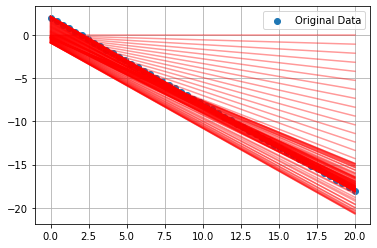

Best fit line:


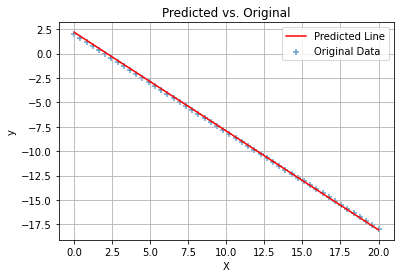

In [29]:
print("Adam Predicted lines:")
print("Hypothesis lines:")
plot_lines(x, y, hyp_values3)
print("Best fit line:")
plot_best_line(x,y, hyp_values3[-1])

In [ ]:
#Result:
'''
- Adam produces the best R2 score and the best line fit for the given data.
- RMSProb stops faster than adagrad and adam.
- Adagrad Converges smoothly but slowly (relative to RMSProb and adam).
- Adam Oscillates around the minimum before converging.
'''

## Congratulations 
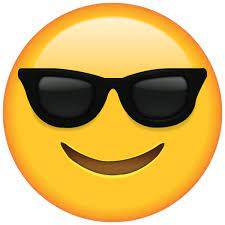